<h1>Decision Trees</h1>

<p><b>Decision trees are supervised machine learning algorithm which can be used for both regression and classification problems.</b></p>

<h3>Classification trees </h3>
<p> Classification trees are built based on a process called recursive partitioning which is nothing but splitting the data into smaller datasets that maximises the homogeneity or similarity of items in each subset.</p>


<p> Data is recursively split into smaller subsets until:<br>
    -> All data in a partition are of the same class<br>
    -> All features have been exhausted<br>
    -> A specified tree size limit or other user-defined condition has been met.<br>
    
<p> Classification tree algorithms use a mathematical formula as a measure of the degree of impurity within a partition</p>
<p><b> Entropy and Gini </b>are commonly used measures of impurity</p>

<h4>Entropy</h4>
<p>Entropy(used by C5.0 decision tree algorithms) is a quanitification of level of randomness or disorder within a partition.
A concept borrowed from Information Theory.
    
<br>
    &emsp;&emsp;Low entropy implies large homogeneity (similarity) in outcomes within a partition and high entropy implies large heterogeneity (dissimilarity) in outcomes within a partition <br>
    
<br>
=> For a 2 class problem, the minimum entropy is 0 and the max is 1 <br>
=> For more than 2 classes, the minimum entropy is 0 but the max can be greater than 1<br>
=> Both log2 and loge can be used to calculoate entropy<br>

    
    

</p>
<p>
For example:
Predict default or not default (Triangle -> default and Circle -> Not default) <br>
30 examples and 16 in triangle class and 14 in circle class<br>
16/30 ~ 0.53<br>
14/30 ~ 0.47<br>
</p>

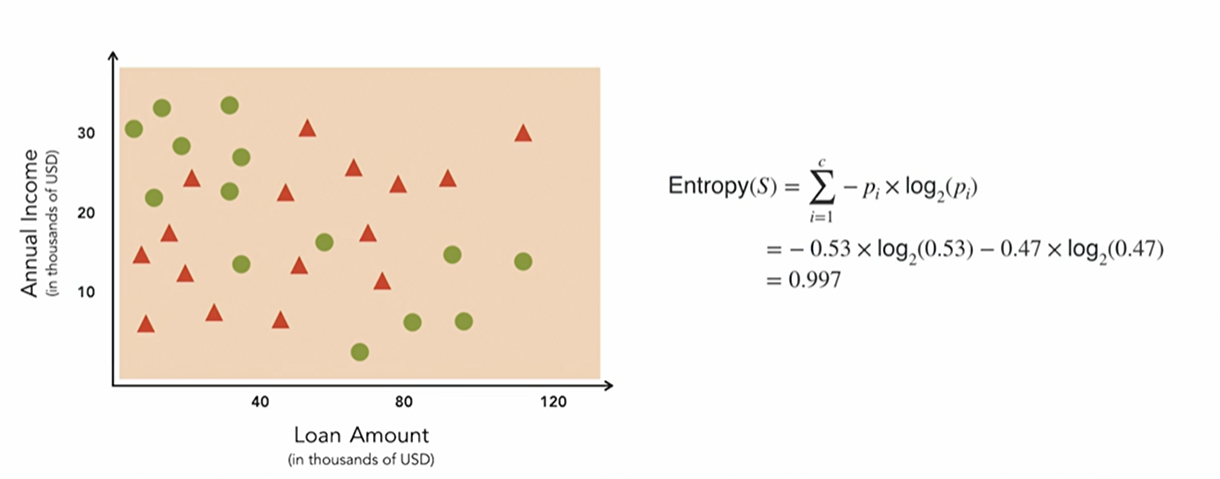


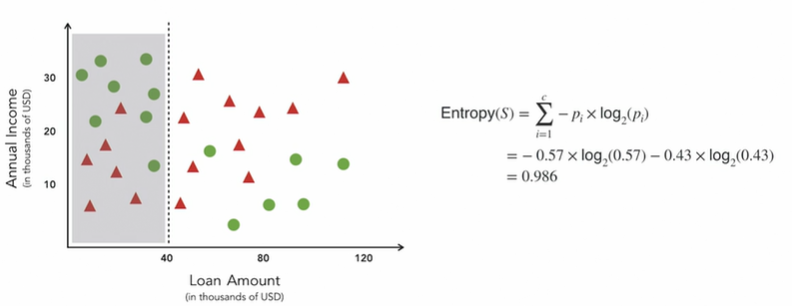

<b>Left partition :</b> <br>
△  - 8/14 = ~0.57 <br>
〇  - 6/14 = ~0.43 <br>

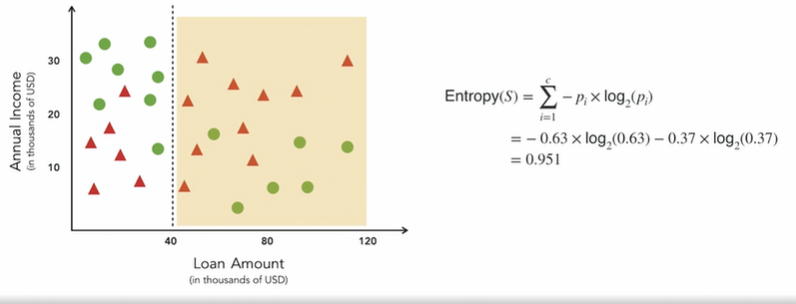


<b>Right partition :</b> <br>
△  - 10/16 = ~0.63 <br>
〇  - 6/16 = ~0.37 <br>

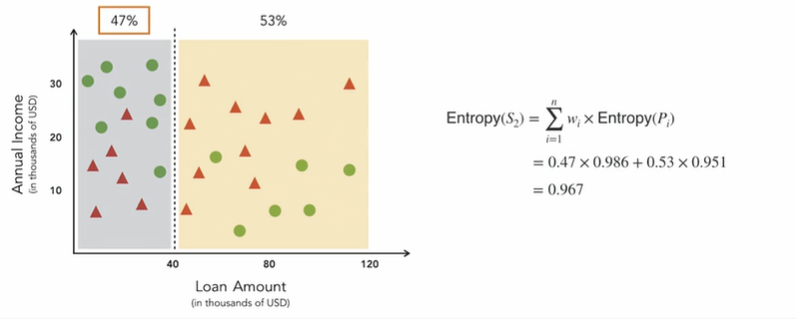

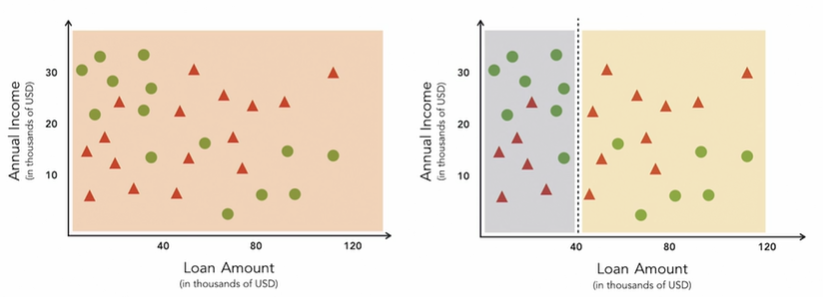

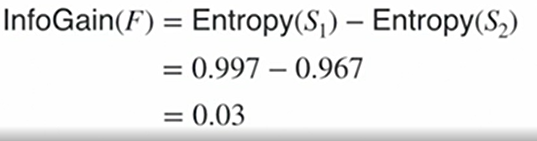


<p><b>Information gain</b> is the difference in entropy before the split and the combined entropy of the partitions after the split. This metric measures the quality of the split.<br>
Constructing a decision tree is all about finding attribute that returns the highest information gain</p>

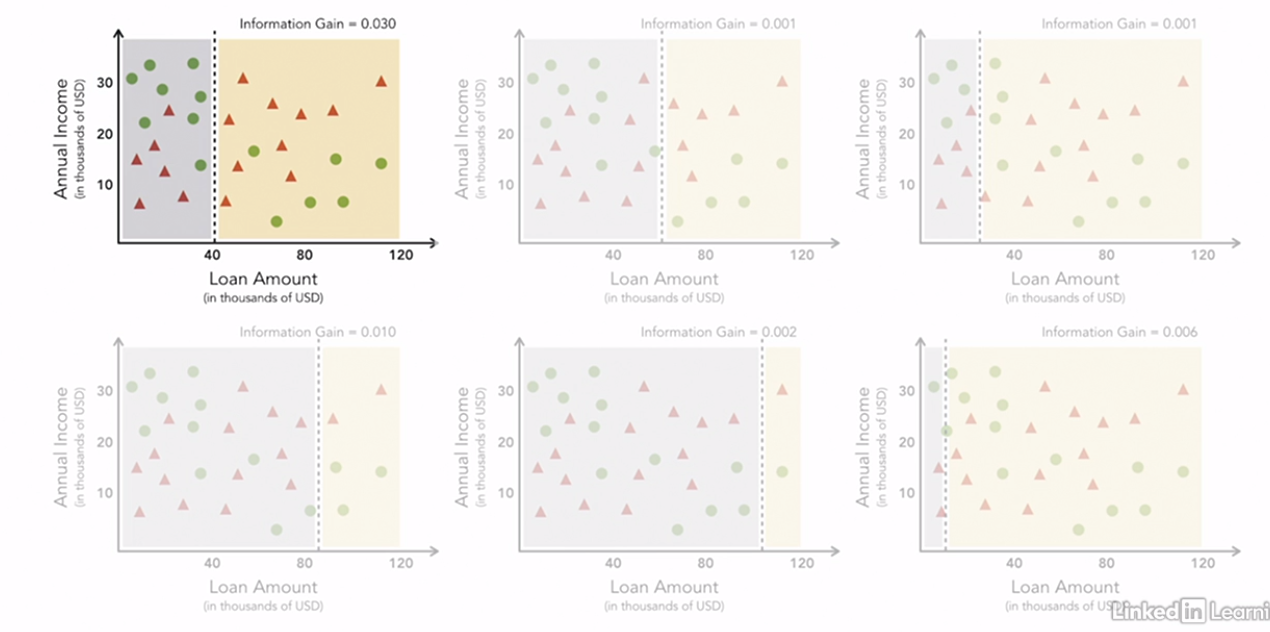

<h4>Gini</h4>
<p>Gini(used by CART algorithms) is a method of statistical dispersion. <p>
    &emsp;&emsp; A measure of how often a prticular example in a partition would be incorrectly labeled if it were randomly labeled based on the distribution of labels in the partition. <br>
    &emsp;&emsp; Similar to entropy, the greater the degree of randomness within a partition, the greater is the gini impurity value</p>
    

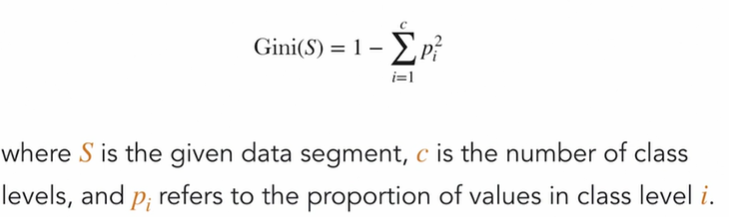

<h3>Regression trees </h3>
<p>Regression trees uses Sum of Squared Residuals (SSR) to find the best possible split </p>

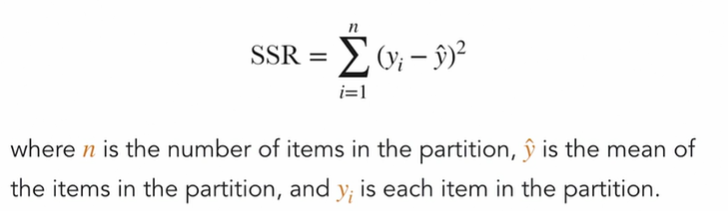

<p> SSR is a quantification of the overall difference between the values in a partition and the average value of the partition.<br>
    High SSR implies the values are dissimilar or very different from mean</p>


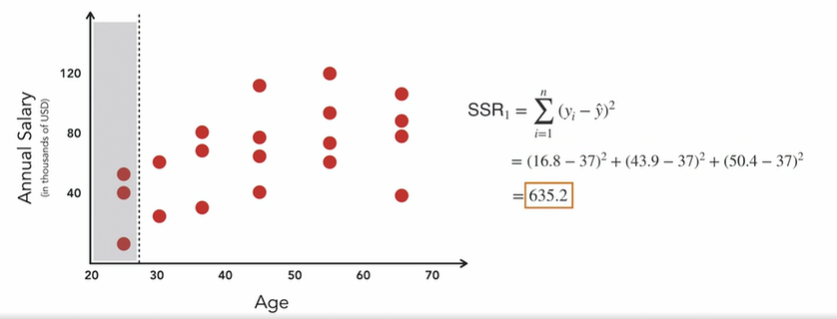

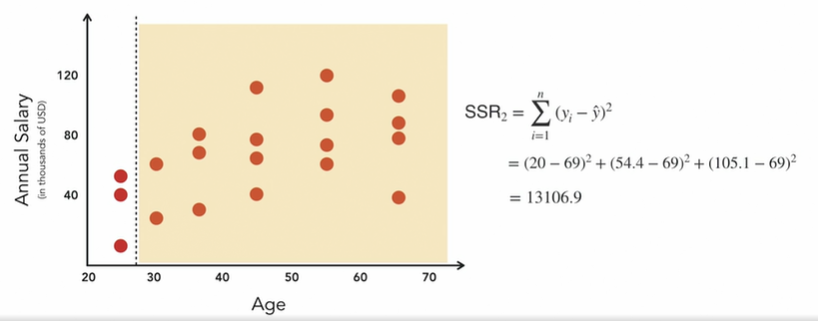

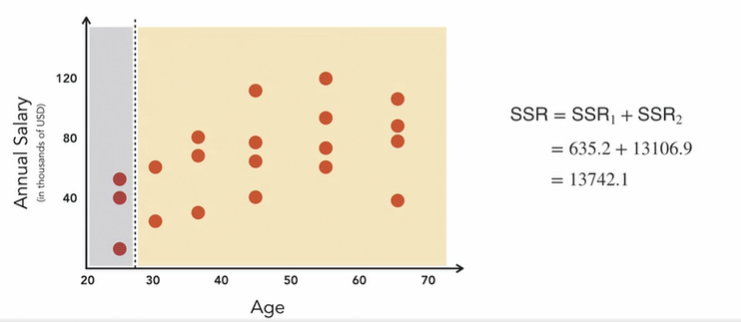

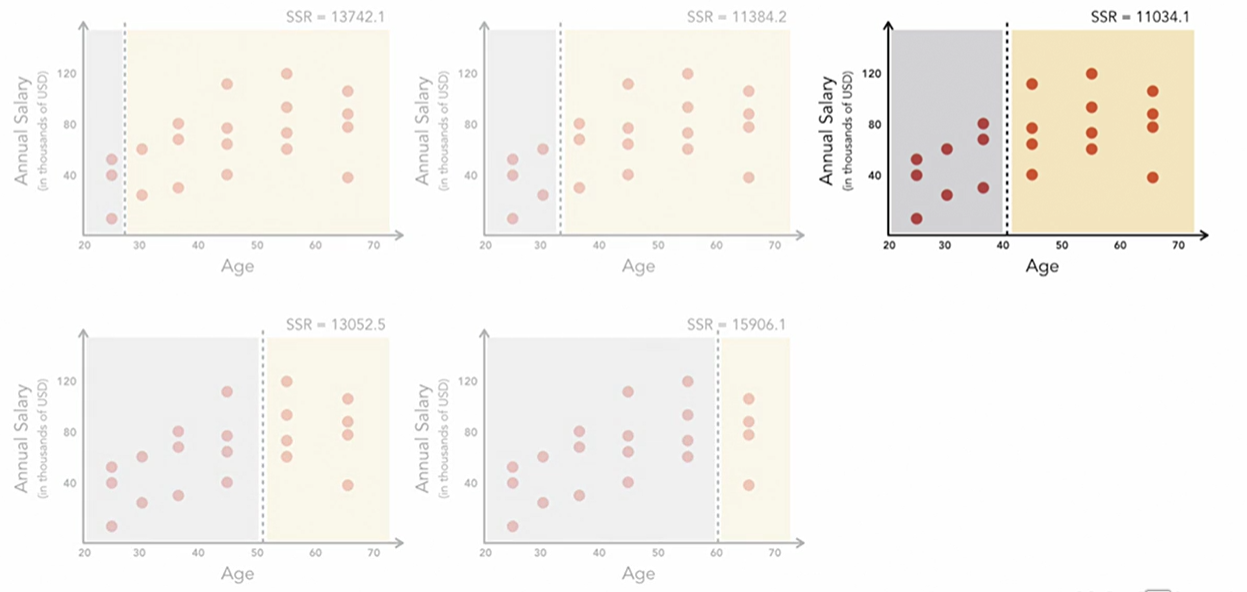


<p><b>Recursive partitioning</b></p>

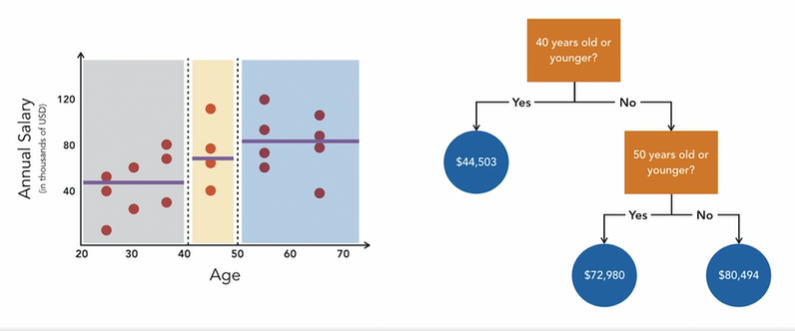



<h3>Overfitting</h3>
<p>
Overfitting explains the training data very well but performs poorly on unseen (test) data. To avoid overfitting, the decision trees have to be <b>pruned</b> during or after recursive partitioning process. Pruning helps a decision tree to generalize well.</p>



<h4>Pre pruning</h4>
<p>The size of the tree can be limited during partioning process by setting a criteria to be met at each split point:<br>
    -> Maximum number of features to be considered for each split<br>
    -> Maximum number of nodes allowed in the decision tree<br>
    -> Minimum number of data points to allow in each partition<br>
    
</p>
<p> Pre pruning is effecient (avoid unnecesary branches and nodes which saves compute cycles) but may result in important patterns being missed.</p>
    
<h4>Post pruning</h4>    
<p> Limit the size of the tree after the recursive partitioning process. Not as effecient as pre-pruning with regard to compute time but effective in discovering important patterns.</p>

<h4>Cost complexity pruning or weakest link pruning</h4>   

<p>Note: The larger a tree gets, the lower its SSR, i.e., better explains the relationship between independent and dependent variables. However, larger trees are more likely to overfit. Hence, a better metric to choose a sub tree is the <b>tree score or cost complexity measure</b></p>
    
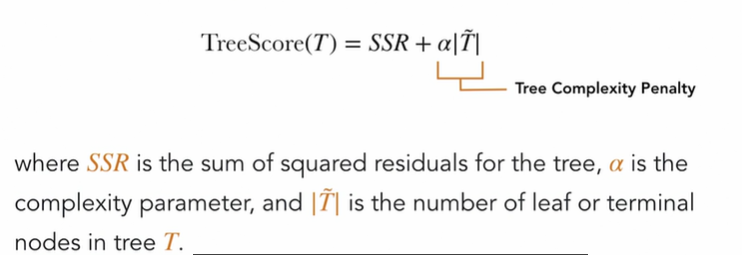

<br>
<p> If classification DT is used, then tree score is calculated by using Entropy/Gini in place of SSR</p>

alpha = 1000
<br>
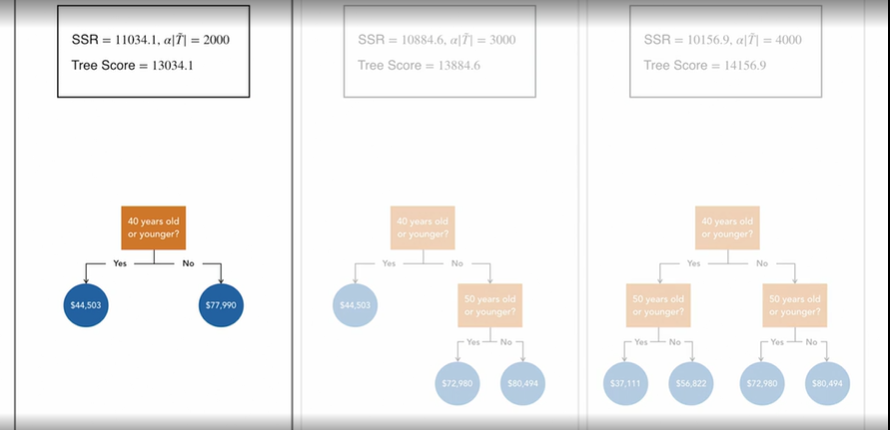

alpha = 100
<br>
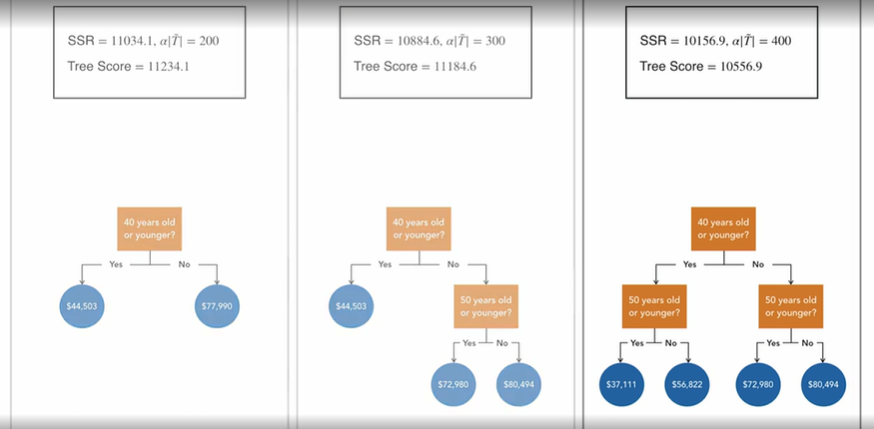

<br>
<p> Now we see that larger alpha values favor simpler trees and lower alpha values favor complex trees.</p>
<p>Alpha is a hyperparameter and hence hyperparameter tuning is used to find the best value for alpha</p>


<h3>Advantages</h3>
<ul>
    <li> DT structure is easy to understand and hence can be used to create business rules</li>
    <li> DT can handle both discreet and continous data well which means it works for both classification and regression problems</li>
    <li> DT does well in handling missing, noisy and outlier data and hence requires less data pre-processing</li>
    <li> Feature selection is not necessary as during each partitioning split, the feature that reduces impurity the most is chosen and hence, unimportant features are ignored by the tree.
</ul>

<h3>Disadvantages/Limitations</h3>
<ul>      
   <li>The recursive partioning process tends to be biased towards features with a large number of unique values (when using entropy).</li>
   <li>unstable as small changes in data can result in larger changes in the structure. To avoid this, DTs are often used as a part of an ensemble</li>  
   <li>Decision trees are non parametric models which means they make very few assumptions about the data.</li>  
   <li>It is easy to overfit or underfit data.</li>  
   <li> DTs are limited to axis-parallel (Vertical or horizontal) splits. </li>
   <li> Class imbalance leads to biased DTs and hence it has to be balanced before fitting a DT.</li>
    </ul> 

<h2>CLASSIFICATION TREES</h2>

In [4]:
!matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

'matplotlib' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
loan = pd.read_csv('datasets/loan.csv')
loan.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [4]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


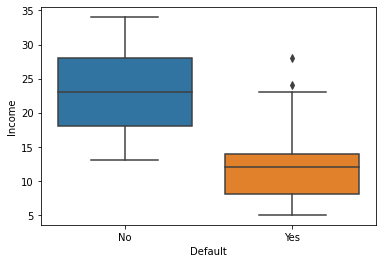

In [7]:
ax = sns.boxplot( data = loan, x = 'Default', y = 'Income')

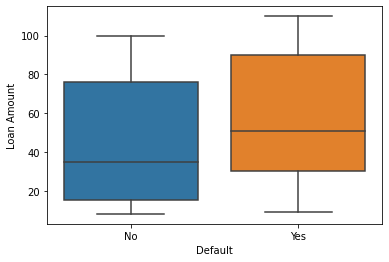

In [8]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Loan Amount')

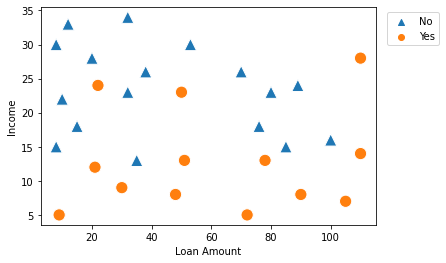

In [9]:
ax= sns.scatterplot(data = loan,
                    x = 'Loan Amount',
                    y = 'Income',
                    hue = 'Default',
                    style = 'Default',
                    markers = ['^','o'],
                    s=150
                   )
ax = plt.legend(bbox_to_anchor = (1.02,1),loc = 'upper left')

In [20]:
#Preparing data

In [35]:
X = loan.iloc[:,:2]
y = loan[['Default']]
X.head()
y.head()

,Default
0,No
1,No
2,Yes
3,No
4,No


In [38]:

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

In [40]:
X_train.shape,y_train.shape

((24, 2), (24, 1))

In [ ]:
#Train and evaluate the classification tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [46]:
model = classifier.fit(X_train,y_train)

In [47]:
model.score(X_test, y_test)

0.5

In [ ]:
#Visualize the classification tree

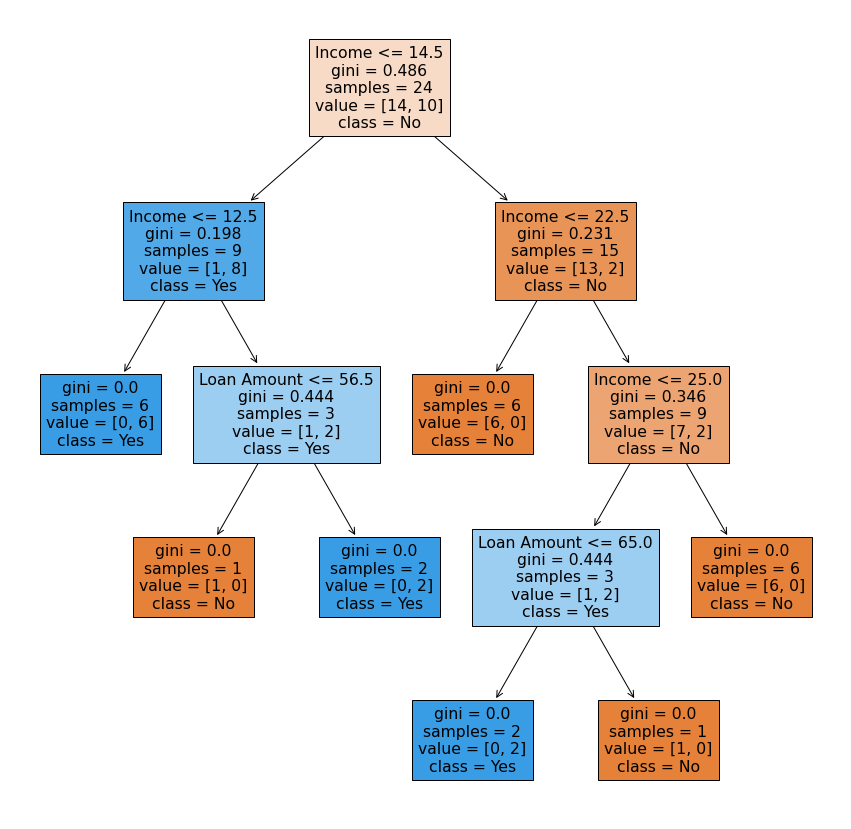

In [48]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model,
              feature_names = list(X.columns),
              class_names=['No','Yes'],
              filled=True);

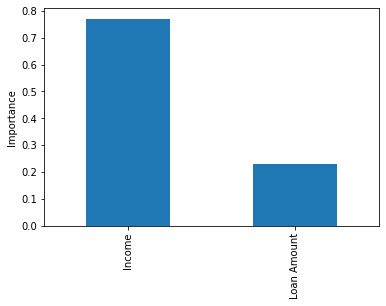

In [49]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns)
feature_importance.plot(kind='bar')
plt.ylabel('Importance');

In [ ]:
#Prune the classification tree

In [50]:
model.score(X_train, y_train)

1.0

In [51]:
model.score(X_test, y_test)

0.5

In [53]:
grid = {'max_depth':[2, 3, 4, 5],
       'min_samples_split':[2, 3, 4],
       'min_samples_leaf':[1, 2, 3, 4, 5, 6]}

In [54]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state=1234)
gcv = GridSearchCV(estimator=classifier, param_grid=grid)
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

In [57]:
model_ = gcv.best_estimator_
model_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, random_state=1234)

In [61]:
model_.fit(X_train, y_train)
print(model_.score(X_test, y_test))
print(model_.score(X_train, y_train))

0.8333333333333334
0.875


<h2>REGRESSION TREES</h2>

In [6]:
income = pd.read_csv('datasets/income.csv')
income.head()

,Age,Education,Salary
0,25,Bachelors,43.9
1,30,Bachelors,54.4
2,45,Bachelors,62.5
3,55,Bachelors,72.5
4,65,Bachelors,74.6


In [65]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        30 non-null     int64  
 1   Education  30 non-null     object 
 2   Salary     30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [66]:
income.describe()

,Age,Salary
count,30.000000,30.000000
mean,43.366667,64.406667
std,14.375466,26.202684
min,24.000000,16.800000
25%,30.500000,46.350000
50%,45.000000,62.100000
75%,55.000000,76.800000
max,65.000000,118.000000


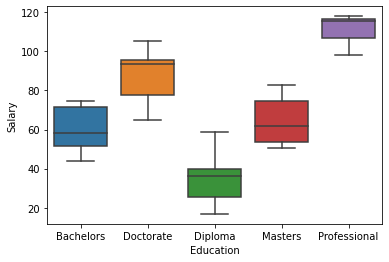

In [67]:
ax = sns.boxplot(data=income, x = 'Education', y = 'Salary')

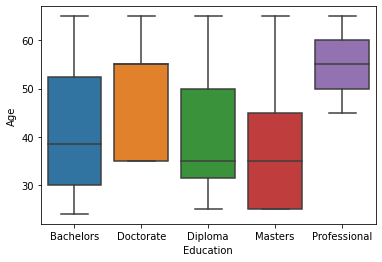

In [68]:
ax = sns.boxplot(data = income, x = 'Education', y = 'Age')

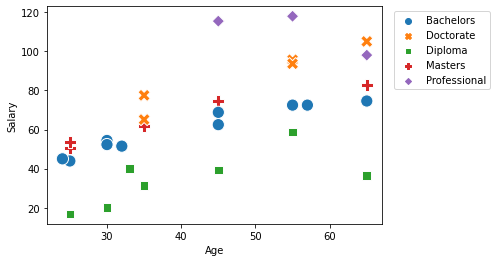

In [78]:
ax = sns.scatterplot(data = income,
                    x = 'Age',
                    y = 'Salary',
                    hue = 'Education',
                    style = 'Education',
                    s=150)
ax = plt.legend(bbox_to_anchor = (1.02,1), loc = 'upper left')

In [7]:
X = income.iloc[:,:2]
y = income[['Salary']]
X
y

,Salary
0,43.9
1,54.4
2,62.5
3,72.5
4,74.6
5,77.5
6,95.7
7,105.1
8,16.8
9,20.0


In [8]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=X['Education'], random_state=1234)

In [9]:
X_train.shape, X_test.shape

((18, 2), (12, 2))

In [10]:
X_train.head()

,Age,Education
0,25,Bachelors
16,45,Masters
17,65,Masters
29,65,Professional
8,25,Diploma


In [11]:
X_train = pd.get_dummies(X_train)
X_train.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
0,25,1,0,0,0,0
16,45,0,0,0,1,0
17,65,0,0,0,1,0
29,65,0,0,0,0,1
8,25,0,1,0,0,0


In [12]:
X_test = pd.get_dummies(X_test)
X_test.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
9,30,0,1,0,0,0
21,25,0,0,0,1,0
4,65,1,0,0,0,0
10,35,0,1,0,0,0
7,65,0,0,1,0,0


In [ ]:
#Train and evaluate the classification tree

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1234)

In [14]:
model = regressor.fit(X_train, y_train)

In [15]:
model.score(X_test, y_test)

0.5853149222529794

In [16]:
y_test_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_test_pred)

13.541666666666666

In [ ]:
#Visualize the regression tree

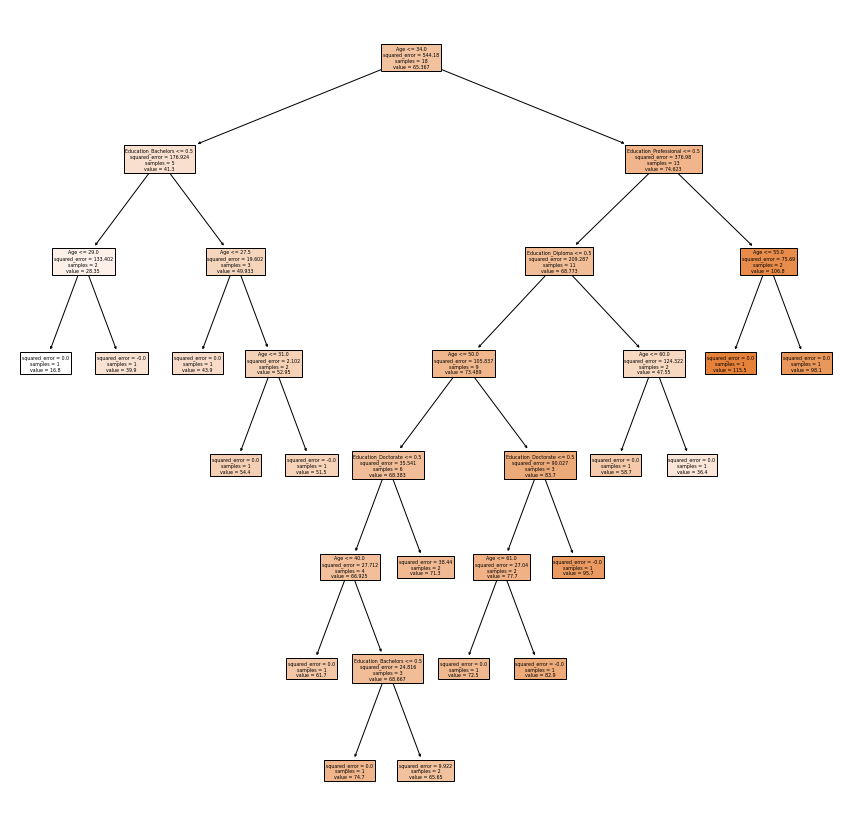

In [19]:
from sklearn import tree
plt.figure(figsize=(15,15))

tree.plot_tree(model,
              feature_names=list(X_train.columns),
              filled=True);

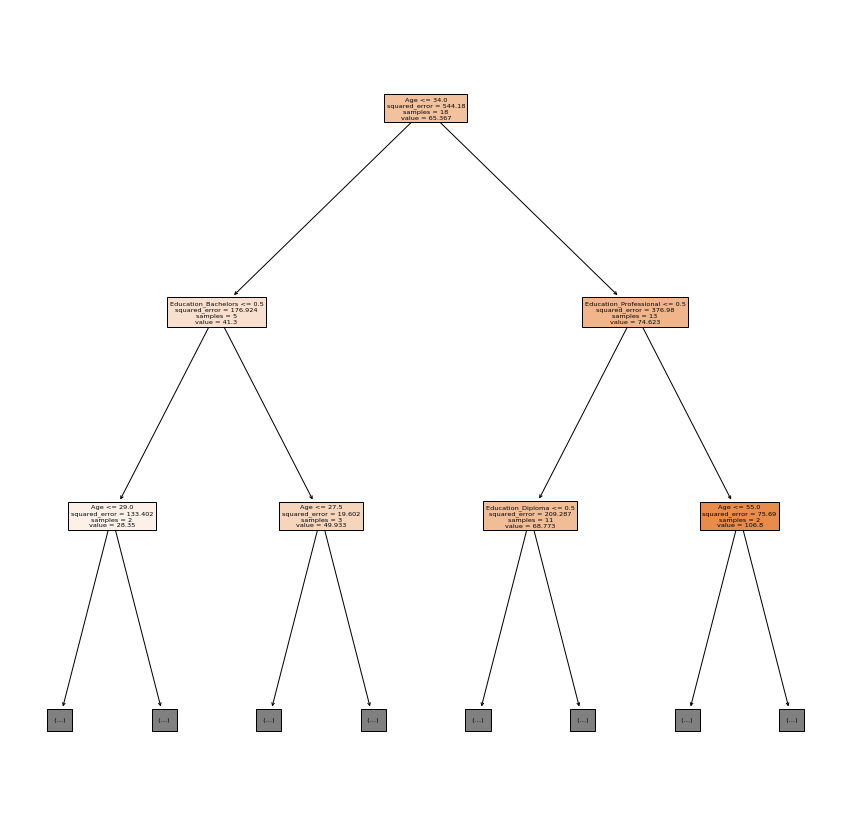

In [22]:
plt.figure(figsize=(15,15))
tree.plot_tree(model,
              feature_names = list(X_train.columns),
              filled= True,
              max_depth = 2);

In [24]:
importance = model.feature_importances_
importance

array([0.54597998, 0.06326845, 0.11352129, 0.02490287, 0.        ,
       0.25232742])

In [25]:
feature_importance = pd.Series(importance, index=(X_train.columns))

Text(0, 0.5, 'Importance')

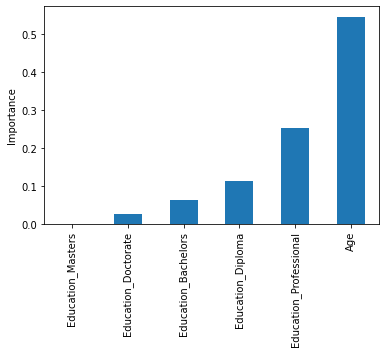

In [31]:
feature_importance.sort_values().plot(kind='bar')
plt.ylabel('Importance')

In [ ]:
#Prune the regression tree

In [32]:
model.score(X_train, y_train)

0.9901253057607573

In [33]:
model.score(X_test, y_test)

0.5853149222529794

In [34]:
#Post pruning - cost complecity pruning
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
list(ccp_alphas)

[0.0,
 0.23361111111110705,
 2.1578395061724223,
 3.004444444444693,
 3.0334259259259144,
 8.409999999999753,
 12.000000000000506,
 13.813611111110644,
 14.822500000000016,
 26.06669753086468,
 31.05601851851865,
 61.1659960718292,
 135.95562548562512,
 222.77094017094078]

In [ ]:
#The larger the value of alpha, the smaller the tree would be. The maximum value of alpha represents just one node

In [35]:
ccp_alphas = ccp_alphas[:-1]
ccp_alphas

array([  0.        ,   0.23361111,   2.15783951,   3.00444444,
         3.03342593,   8.41      ,  12.        ,  13.81361111,
        14.8225    ,  26.06669753,  31.05601852,  61.16599607,
       135.95562549])

In [42]:
#Next, we train several trees using the different values of alpha

train_scores, test_scores = [],[]

for alpha in ccp_alphas:
    regressor = DecisionTreeRegressor(random_state= 1234, ccp_alpha = alpha)
    model = regressor.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

Text(0.5, 1.0, 'R-squared by alpha')

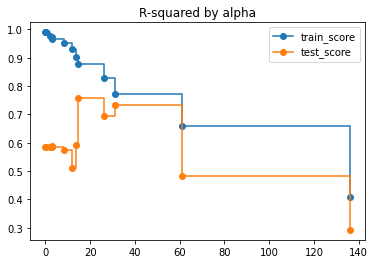

In [43]:
plt.plot(ccp_alphas,
         train_scores,
         marker="o",
         label = 'train_score',
         drawstyle = "steps-post"
        )
plt.plot(ccp_alphas,
         test_scores,
         marker="o",
         label = 'test_score',
         drawstyle = "steps-post"
        )
plt.legend()
plt.title("R-squared by alpha")

In [44]:
test_scores

[0.5853149222529794,
 0.5857107382012932,
 0.5857107382012932,
 0.5889110156116097,
 0.5861012049128272,
 0.5742699063850475,
 0.5110187660049715,
 0.5901546580161237,
 0.7572572323335666,
 0.6933555316243081,
 0.7328980549684876,
 0.4823659659054369,
 0.2920328593359385]

In [47]:
ix = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[ix]
best_alpha

14.822500000000016

In [50]:
regressor = DecisionTreeRegressor(random_state=1234, ccp_alpha = best_alpha)
model_ = regressor.fit(X_train, y_train)

In [51]:
model_.score(X_train, y_train)

0.8765762758237674

In [53]:
model_.score(X_test, y_test)

0.7572572323335666

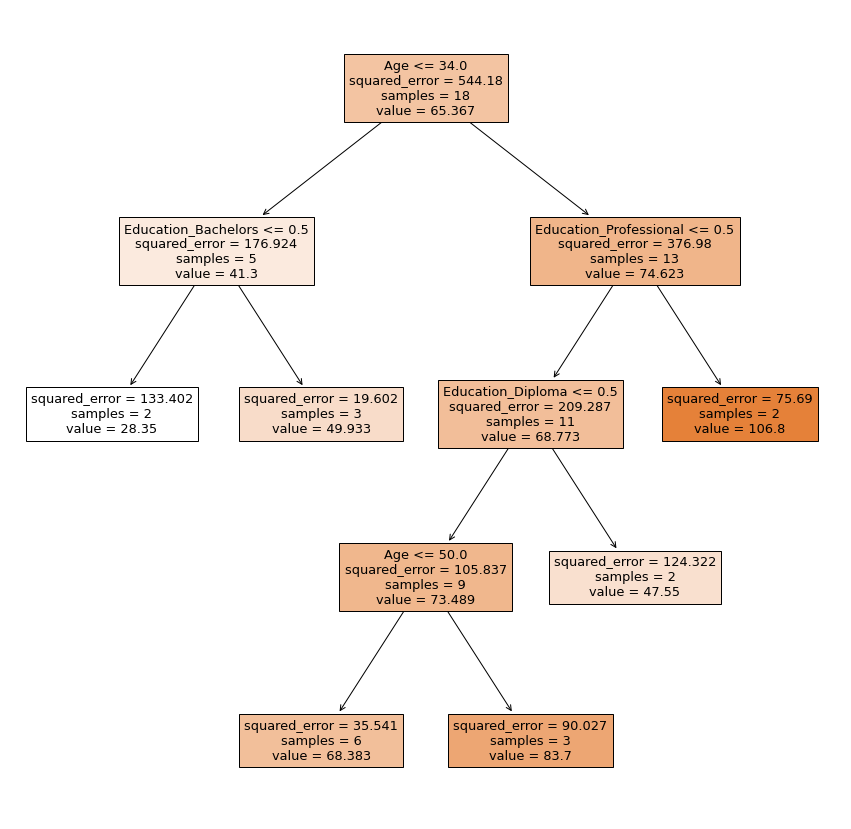

In [56]:
plt.figure(figsize=(15,15))
tree.plot_tree(model_,
               feature_names = list(X_train.columns),
               filled=True
               );